# Chapter 5 | 지도 학습: 회귀

## 1차원 입력 직선 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=0)
X_min = 4
X_max = 30
X_n = 16
#print(5+25*np.random.rand(X_n))

In [3]:
#나이
X = 5+25*np.random.rand(X_n)
print(np.round(X,2))

[18.72 22.88 20.07 18.62 15.59 21.15 15.94 27.29 29.09 14.59 24.79 18.22
 19.2  28.14  6.78  7.18]


In [4]:
#생성매개변수
Prm_c = [170, 108, 0.2]

In [5]:
#키
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.rand(X_n)
print(np.round(T,2))

[167.53 172.22 171.16 170.87 169.14 171.62 167.39 172.66 170.15 166.72
 169.81 170.96 169.77 171.27 143.2  147.4 ]


In [6]:
np.savez('ch5_data.npz', X=X, X_min = X_min, X_max = X_max, X_n = X_n, T=T)

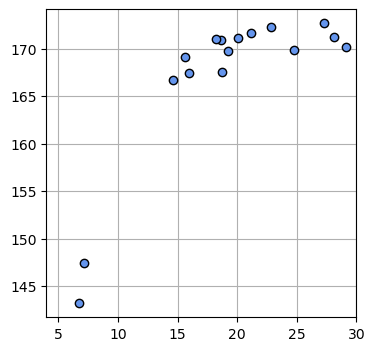

In [7]:
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle = 'None', markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

### 직선 모델

### 제곱 오차 함수

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
def mse_line(x, t, w):
    y = w[0] * x +w[1]
    #print(y.shape)
    mse = np.mean((y-t)**2)
    #print(mse.shape)
    return mse

In [10]:
xn =100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1],xn)
#print(x0)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
#print(x1)

In [11]:
xx0, xx1 = np.meshgrid(x0, x1)

In [12]:
J = np.zeros((len(x0), len(x1)))
print(J.shape) #(100,100)

(100, 100)


In [13]:
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0],x1[i1]))

# J[i0, i1] 이 아닌 이유
# mesh grid를 생각해보면 ...[-25,120  -25.1,120  -25.2,120 ...]
                        #   -25,120.1 -25.1,120.1  -25.2,120.1 ... 순으로 되어있음..

# J[i0, i1] 으로 집어넣으면 
#[  -25,120    -25,120.1     -25,120.2 ... ]
# -25.1,120  -25.1,120.1   -25.1,120.2 ...
#이런식으로 저장이 됨..

#즉 x0, x1 좌표에 상응하는 J값이 다르게 됨
# 따라서 J[i1, i0]으로 지정해주는 거임

# (X,T) = 16개있음. 
print(np.min(J))
# (X,T) = 16개있음. 
print(np.min(J))
print(np.where(J == np.min(J)))
print(np.argmin(J))

26.737824768766025
26.737824768766025
(array([45], dtype=int64), array([52], dtype=int64))
4552


In [14]:
print(J[29,53])

47.74769968771845


In [15]:
print(x0[53],x1[29])

1.7676767676767682 134.64646464646464


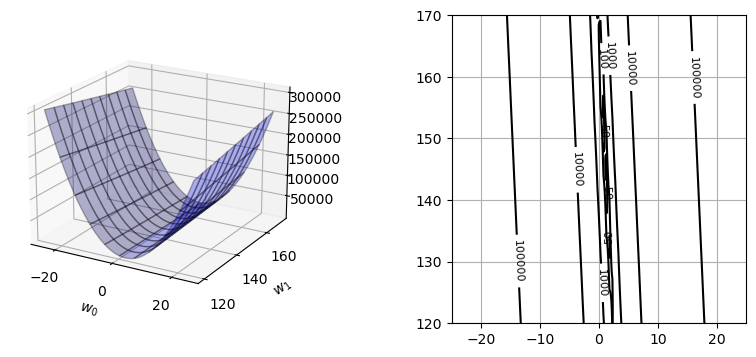

In [16]:

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J , rstride = 10, cstride =10, alpha = 0.3, color = 'blue', edgecolor = 'k')
ax.set_xticks([-20,0,20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = [50,100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize = 8)
plt.grid(True)
plt.show()

#### 코드 이해

In [17]:
xn =100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1],xn)
#print(x0)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
#print(x1)

xx0, xx1 = np.meshgrid(x0, x1)

J = np.zeros((len(x0), len(x1)))
print(J.shape) #(100,100)

for i0 in range(xn):
    for i1 in range(xn):
        J[i0, i1] = mse_line(X, T, (x0[i0],x1[i1]))

# (X,T) = 16개있음. 
print(np.min(J))
print(np.where(J == np.min(J)))
print(np.argmin(J))

(100, 100)
26.737824768766025
(array([52], dtype=int64), array([45], dtype=int64))
5245


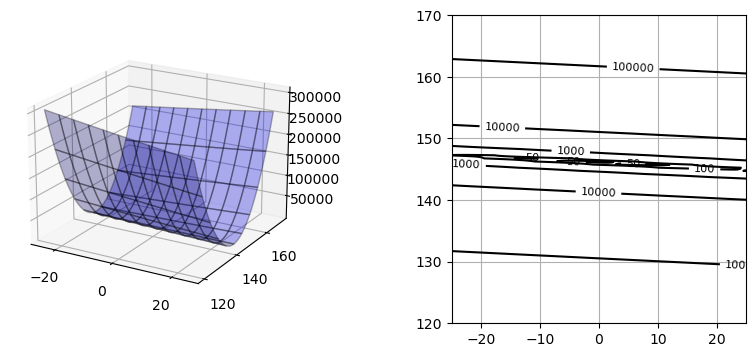

In [18]:
# J[i0, i1] = mse_line(X, T, (x0[i0], x1[i1])) 으로 지정하면 생기는 일

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J , rstride = 10, cstride =10, alpha = 0.3, color = 'blue', edgecolor = 'k')
ax.set_xticks([-20,0,20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = [50,100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize = 8)
plt.grid(True)
plt.show()

### 매개 변수 구하기(경사 하강법) gradient descent

In [19]:
# J가 가장 작아지는 w0, w1 구하기 

In [20]:
def dmse_line(x,t,w):
    # 직선 방정식
    y=w[0]*x+w[1]
    # w0에 대한 편미분
    d_w0 = 2*np.mean((y-t)*x)
    # w1에 대한 편미분
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

In [21]:
# 예시로 w0 = 10, w1 = 165 의 기울기(gradient) 구하기
d_w =dmse_line(X, T, [10, 165])
print(np.round(d_w,1))

[8059.   381.3]


**dmse_line을 사용하여 mse_line 을 최소화하는 w0, w1 찾기**  
w_init = [10.0, 165.0]  
갱신단계의 폭이 되는 학습비율은 alpha = 0.001  
w가 평평한 곳에 도달 즉, 기울기가 충분이 적어지면 w의 갱신 종료
구체적으로는 eps = 0.1 보다 작으면 for문에서 빠져나온다

In [22]:
def fit_lin_num(x,t):
    #초기매개변수
    w_init = [10.0, 165.0]
    
    # 학습률
    alpha = 0.001
    
    #반복의 최대수
    i_max = 100000
    
    #반복을 종료할 기울기의 절대값 한계
    eps = 0.1
    
    w_i = np.zeros([i_max, 2])
    w_i[0,:] = w_init
    
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        #w(t) = w(t-1) - alpha * dw 
        w_i[i,0] = w_i[i-1,0] - alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha*dmse[1]
        
        if max(np.absolute(dmse)) < eps:
            break
            
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    
    return w0, w1, dmse, w_i

반복횟수 18368
W=[1.041765, 146.971763]
dMSE = [-0.004688, 0.099994]
MSE = 25.218215


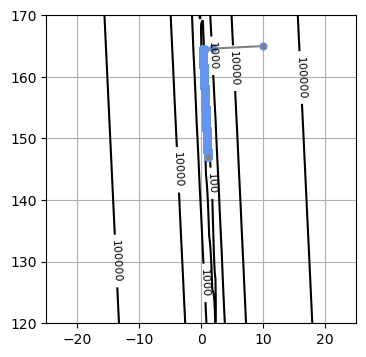

In [23]:
plt.figure(figsize=(4,4))
xn = 100
w0_range=[-25,25]
w1_range=[120,170]

x0 = np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0, xx1 = np.meshgrid(x0,x1)

J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T,(x0[i0],x1[i1]))

cont = plt.contour(xx0,xx1, J, 30, colors = 'k',levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_lin_num(X,T)

print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE = [{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0], W_history[:,1],'.-',color='gray',markersize=10, markeredgecolor='cornflowerblue')


In [24]:
def show_line(w):
    xb = np.linspace(X_min,X_max,100)
    y=w[0]*xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    

w0=1.042, w1=146.972
SD=5.022cm


<function matplotlib.pyplot.show(close=None, block=None)>

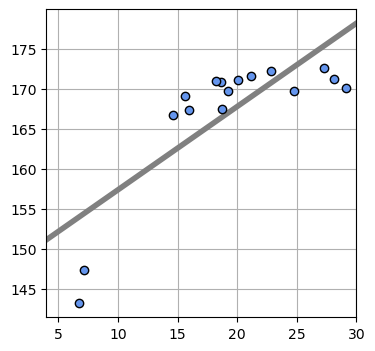

In [25]:
plt.figure(figsize=(4,4))
W = np.array([W0,W1])
mse = mse_line(X,T,W)
print("w0={0:.3f}, w1={1:.3f}".format(W0,W1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T, marker='o',linestyle = 'None', color = 'cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show

### 선형 모델 매개 변수의 해석해

In [26]:
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx - mt*mx)/(mxx -mx**2)
    w1 = (mt - w0*mx)
    
    return np.array([w0,w1])

w0=1.066, w1=146.455
SD=5.019cm


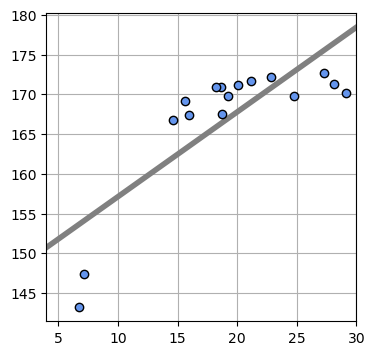

In [27]:
W = fit_line(X,T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0],W[1]))
mse = mse_line(X,T,W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T, marker='o', linestyle = 'None',color="cornflowerblue",markeredgecolor = 'k')
plt.xlim(X_min, X_max)
plt.grid(True)

## 2차원 입력면 모델

In [28]:
X0 = X
X0_min = 5
X0_max = 30

np.random.seed(seed=1)

#np.random.randn(m,n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수를 matrix array(m,n) 생성
#X_n = 16 으로 위에서 설정함.
X1 = 23*(T/100)**2+2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [29]:
print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

[18.72 22.88 20.07 18.62 15.59 21.15 15.94 27.29 29.09 14.59 24.79 18.22
 19.2  28.14  6.78  7.18]
[67.8  66.99 66.33 65.01 67.53 63.14 67.93 67.05 67.23 63.43 69.25 63.1
 65.64 66.7  49.44 47.77]
[167.53 172.22 171.16 170.87 169.14 171.62 167.39 172.66 170.15 166.72
 169.81 170.96 169.77 171.27 143.2  147.4 ]


X0 = 나이  
X1 = 몸무게  
T = 키  

In [30]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        # 밑의 그림 내, 회색 수직선 그리는 것
        # 밑 고정점은 (x0[0],x1[0]) ~ (x0[i],x1[i]) (총 16개 이고)
        # 이 고정점을 z축인 키까지 늘리는 것이 [0,t[i]]
        ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[120,t[i]],
                color='gray')
        
        
        ax.plot(x0,x1, t, 'o',
               color='cornflowerblue', markeredgecolor='black',
               markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)
        


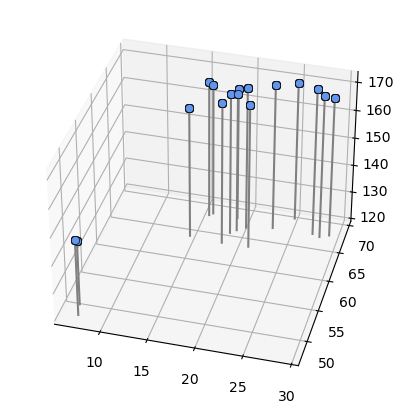

In [31]:
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1, projection='3d')
show_data2(ax, X0,X1,T)
plt.show()

### 데이터의 표시 방법

### 면 모델

In [32]:
#평면 그리기
def show_plane(ax, w):
    #나이
    px0 = np.linspace(X0_min, X0_max, 5)
    #몸무게
    px1 = np.linspace(X1_min, X1_max, 5)
    
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    
    ax.plot_surface(px0,px1,y, rstride = 1, cstride=1, alpha = 0.3,
                   color = 'blue', edgecolor = 'black')

In [33]:
#평균 오차 구하기
def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 +w[2]
    mse = np.mean((y-t)**2)
    
    return mse

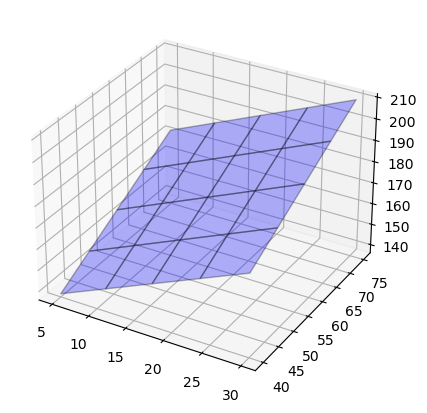

In [34]:
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
W = [1.5, 1, 90]
show_plane(ax, W)

SD=17.821cm


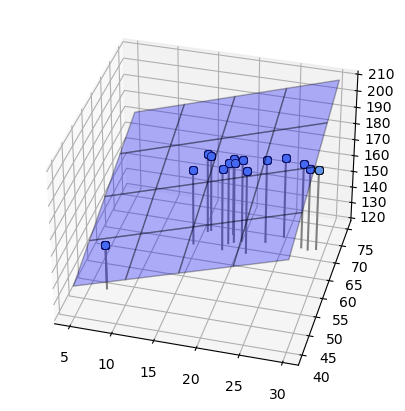

In [35]:
#메인 함수
#vidualization
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()

In [36]:
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t*x0)-np.mean(t)*np.mean(x0)
    c_tx1 = np.mean(t*x1)-np.mean(t)*np.mean(x1)
    c_x0tx1 = np.mean(x0*x1)-np.mean(x0)*np.mean(x1)
    
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    
    w0 = (c_tx1*c_x0tx1 - v_x1*c_tx0) / ((c_x0tx1)**2 - v_x0*v_x1)
    w1 = (c_tx0*c_x0tx1 - v_x0*c_tx1) / ((c_x0tx1)**2 - v_x0*v_x1)
    w2 = -w0*np.mean(x0) - w1*np.mean(x1) + np.mean(t)
    
    return np.array([w0,w1,w2])

w0=0.3, w1=1.0, w2=94.7
SD=2.968cm


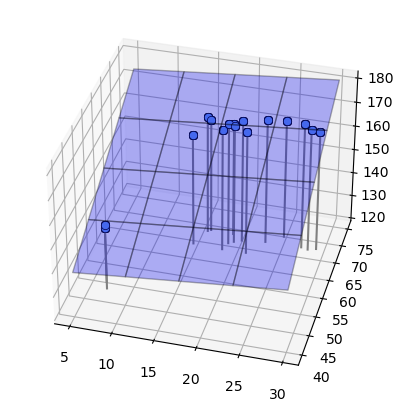

In [37]:
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0],W[1],W[2]))

show_plane(ax,W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0,X1,T,W)

print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()

## D차원 선형 회귀 모델

### D차원 선형 회귀 모델

## 선형 기저 함수 모델

In [38]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [40]:
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2*s**2))

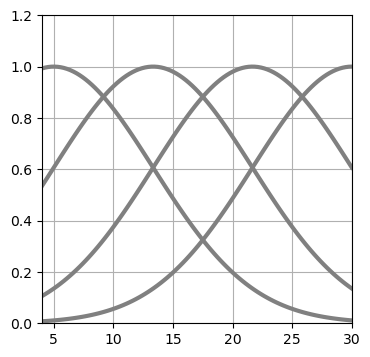

In [41]:
M = 4
plt.figure(figsize=(4,4))
mu = np.linspace(5,30,4)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
    
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

In [42]:
a= np.array([[1,2],[2,1],[3,2]])
a.shape

(3, 2)

In [43]:
# 선형 기저 함수 모델
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[0] - mu[1]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    # 책 식 5-65 만드는 line
    y = y + w[m]
    return y

In [44]:
# 평균 제곱 오차를 계산하는 함수
def mse_gauss_func(x, t, w):
    #함수를 따르는 y 값 (함수 결과 값)
    y = gauss_func(w, x)
    #실제 측정값 (키 데이터값)
    mse = np.mean((y-t)**2)
    return mse

In [45]:
#선형 기저 함수 모델 정확한 해
def fit_gauss_func(x,t,m):
    mu = np.linspace(5, 30, m)
    #m = 기저함수 갯수  여기서는 4개
    s = mu[1] - mu[0]
    n = x.shape[0]
    # 기저함수는 원래 4개지만 마지막에 psi(x) = 1 이라고 하는 dummy 기초함수를 추가해서 n * m+1 으로 설정
    psi = np.ones((n, m+1)) #row = n, column = m+1
    
    for j in range(m):
        #위와 이어서... 마지막인 dummy 기초함수는 어차피 1이므로 range(m+1)이 아닌 range(m) 으로 설정
        psi[:,j] = gauss(x, mu[j], s)
        #print("psi shape:{}".format(psi.shape))
    
    psi_T = np.transpose(psi)
    #print("psi_T shape:{}".format(psi_T.shape))
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    
    return w

In [46]:
# 그래프 그리는 함수
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, color = [.5, .5, .5], lw=4)

W=[ -2.7  52.2  -1.8  55.2 108. ]
SD=1.15 cm


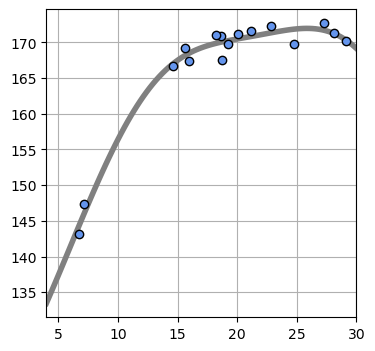

In [47]:
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle = 'None',
        color = 'cornflowerblue', markeredgecolor='k')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

## 오버피팅의 문제

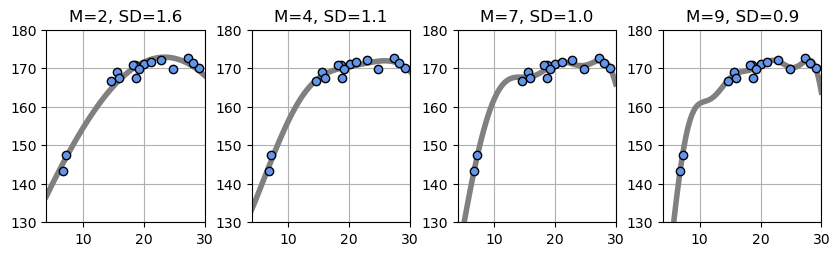

In [48]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]

for i in range(len(M)):
    plt.subplot(1, len(M), i+1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker ='o', linestyle = 'None',
            color = 'cornflowerblue', markeredgecolor = 'k')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i],np.sqrt(mse)))
    
plt.show()

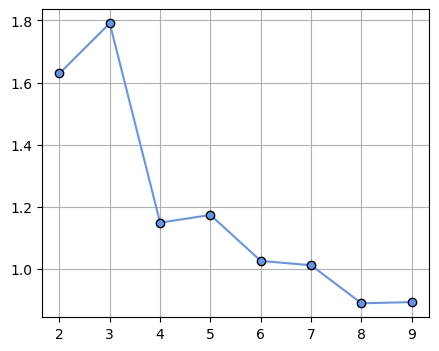

In [49]:
# M = 2 ~ 9 까지 SD계산하고 플롯해보자

plt.figure(figsize=(5,4))
M = range(2,10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))

plt.plot(M, mse2, marker='o', color='cornflowerblue', markeredgecolor ='k')
plt.grid(True)

In [50]:
# 훈련 데이터, 테스트 데이터로 나누기
X_test = X[:int(X_n/4 +1)]
T_test = T[:int(X_n/4 +1)]
X_train = X[int(X_n/4 +1):]
T_train = T[int(X_n/4 +1):]

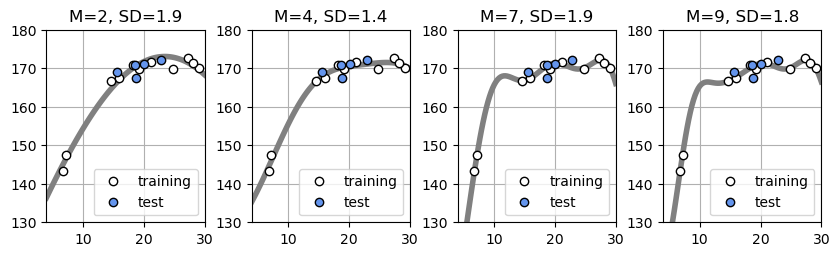

In [51]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1,len(M), i+1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker = 'o', linestyle = 'None',
             color = 'white', markeredgecolor='k', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='k', label = 'test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test,T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))

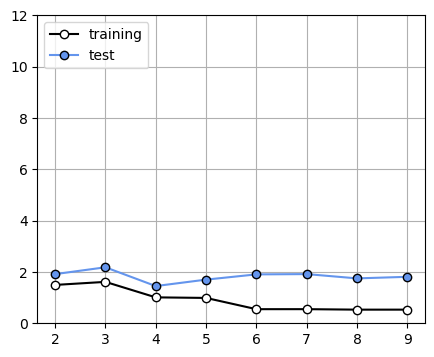

In [52]:
# M을 2부터 9까지 하나씩 이동하여, 훈련데이터와 테스트 데이처의 오차 plot하기
plt.figure(figsize=(5,4))
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))

plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white',markeredgecolor='black',
         color='k', label='training')
plt.plot(M, mse_test, marker='o', linestyle = '-',
         color = 'cornflowerblue', markeredgecolor='black',
         label='test')

plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


### K겹 교차검증

In [53]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0,k):
        #numpy fmod : 앞에꺼 / 뒤에꺼의 나머지를 반환
        #0부터 n미만의 수까지 k로 나눴을때 나오는 나머지를 반복해서 반환함
        # ex - n이 8이고, k가 4라고 하면, 
        #반환이 되는 array는 [0, 1, 2, 3, 0, 1, 2, 3]이 된다. 
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i ]
        t_test = t[np.fmod(range(n), k) == i ]
        
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
        
    return mse_train, mse_test

In [54]:
a = np.fmod(range(16), 4)
a

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3], dtype=int32)

In [55]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([0.90577649, 1.52167495, 0.83705168, 1.17207665]),
 array([3.87193265, 1.38635511, 4.37868899, 2.72597791]))

In [56]:
# 분할수 최대 16, M은 2~7으로 바꿔가며 오차 평균 계산해서 플롯해보기
# 가장 적합한 M 갯수 찾기
M = range(2, 8)
K = 16

Cv_Gauss_train = np.zeros((K, len(M))) # 16 * M
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:,i], Cv_Gauss_test[:,i] =\
        kfold_gauss_func(X, T, M[i], K)
        
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0)) #M에 따른 mse 만 남김. 16개 fold에 대해서 평균해버림
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

In [57]:
print(Cv_Gauss_train)
print("평균", mean_Gauss_train)

[[2.19302771 2.53193929 0.901774   0.92965455 0.5851722  0.5869015 ]
 [2.80313404 3.41971876 1.33563944 1.3691811  0.96706493 0.94808609]
 [2.81540471 3.37108617 1.3698704  1.42867823 1.11950567 1.09076237]
 [2.81121312 3.42088299 1.34755547 1.40995626 1.05341517 0.99966962]
 [2.21721366 2.67800896 1.31121349 1.37405541 0.90306827 0.8892577 ]
 [2.79827898 3.37768051 1.35186334 1.40047235 1.11087476 1.09069581]
 [2.8092919  3.38717575 1.31113133 1.36638205 1.10795661 1.0748967 ]
 [2.66073975 3.00528875 1.31465785 1.34406763 1.03465457 1.03247625]
 [2.76688392 3.41882996 1.39850432 1.45744271 1.12052192 1.03407468]
 [2.47348404 2.7687989  1.40035325 1.46534129 0.94837755 0.89911163]
 [2.21482367 3.03968469 0.93089052 0.97456612 0.8823575  0.85099919]
 [2.75128512 3.39461886 1.31067493 1.37256139 0.95976177 0.87479761]
 [2.73349359 3.22461883 1.39089169 1.45152287 1.07954568 1.05232336]
 [2.76943554 3.33687242 1.40662066 1.46813206 1.11182316 1.05214157]
 [2.17611998 2.48158277 1.17171563

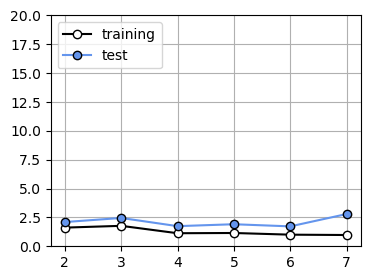

In [58]:
plt.figure(figsize=(4,3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='k', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)

# M = 4이 최적임을 확인할 수 있었다. 

SD=1.15cm


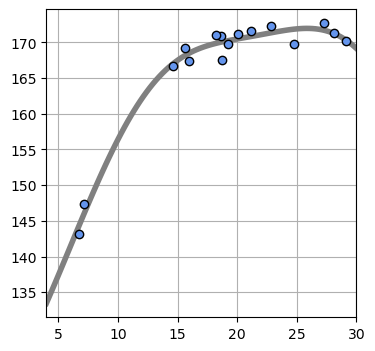

In [59]:
# 위에서 확인한 최적의 M갯수인 M = 4로 설정하여 plot하기
M = 4
plt.figure(figsize=(4,4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='k')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

## 새로운 모델의 생성

In [60]:
# 모델 A 를 나타내는 함수
def model_A(x, w):
    y = w[0]-w[1]*np.exp(-w[2]*x)
    return y


In [61]:
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, color=[.5,.5,.5], lw=4)

In [62]:
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

In [63]:
from scipy.optimize import minimize

def fit_model_A(w_init, x, t): 
    #w_init : 반복연산을 위한 매개변수의 초기값
    #x : 입력데이터
    #t : 목표데이터
    res1 = minimize(mse_model_A, w_init, args=(x,t), method="powell")
    # mse_model_A : 최소화할 목표 함수
    # w_init : w 의 초기값
    # args=(x,t) : 세번째 인수는 목표 함수 mse_model_A 를 최적화하는 매개변수 w이외의 인수인 x, t
    # method = powell 구배를 사용하지 않는 최적화 방법인 파웰 알고리즘을 지정.
    return res1.x

In [64]:
w_init = [100,0,0]
res = minimize(mse_model_A, w_init, args=(X,T), method = "powell")
res

# x : the solution of the optimization
# fun : values of objrective fuction, its Jacobian and its Hessian. 
# nit : the number of iterations performed by the optimizer

   direc: array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-2.12936709e-01, -6.18103979e-09,  2.55085533e-04]])
     fun: 67.29424132483125
 message: 'Optimization terminated successfully.'
    nfev: 144
     nit: 3
  status: 0
 success: True
       x: array([ 1.66167125e+02, -9.01653411e-08, -6.22580228e-01])

In [65]:
a = mse_model_A(res.x, X, T)
a

67.29424132483125

In [66]:
b = model_A(X, res.x)
b


array([166.17751744, 166.30558854, 166.19119012, 166.17690077,
       166.16860677, 166.21421522, 166.16896551, 168.3296716 ,
       172.78791687, 166.16791757, 166.62282982, 166.17474722,
       166.1811437 , 169.82811882, 166.16713146, 166.1671332 ])

w0=171.6, w1=139.8, w2=0.2
SD=1.13cm


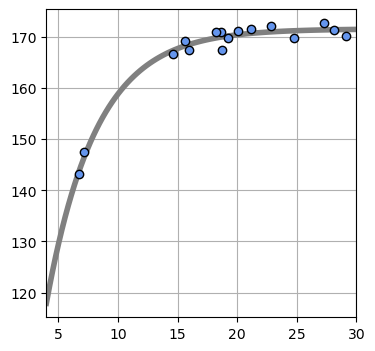

In [67]:
plt.figure(figsize=(4,4))
W_init = [0,0,0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color = 'cornflowerblue', markeredgecolor='k')
plt.xlim(X_min, X_max)
plt.grid(True)

mse = mse_model_A(W, X, T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))


## 모델의 선택

In [68]:
# 모델 A 의  LOOCV (leave only one cross validation test)
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i ]
        t_test = t[np.fmod(range(n), k) == i ]
        
        
        wm = fit_model_A(np.array([169,113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
        
    return mse_train, mse_test, wm

In [69]:
K = 16
n = len(X)
mse_train = np.zeros(K)
mse_test = np.zeros(K)

for i in range(0, K):
    x_train = X[np.fmod(range(n), K) != i]
    t_train = T[np.fmod(range(n), K) != i]
    x_test = X[np.fmod(range(n), K) == i ]
    t_test = T[np.fmod(range(n), K) == i ]
        
    wm = fit_model_A(np.array([100,0,0]), x_train, t_train)
    mse_train[i] = mse_model_A(wm, x_train, t_train)
    mse_test[i] = mse_model_A(wm, x_test, t_test)



In [70]:
mse_test


array([7.13941228e+00, 3.10773273e+01, 6.32344857e-01, 1.00565940e+00,
       1.04567747e+01, 1.04285776e+00, 1.84521975e+00, 2.44321853e+01,
       1.42047996e+02, 1.29786521e-01, 1.26458913e+01, 2.43127311e+01,
       1.31845087e+01, 3.31715999e+00, 3.25208122e+00, 4.14041826e+02])

In [71]:
mse_train

array([ 0.92344763, 73.25492477,  1.32319404,  1.30039029, 71.04720822,
        1.2983537 ,  1.26262659, 70.50816866, 70.9592766 , 72.70451768,
       71.91469449, 71.19590698, 71.95614195, 71.57994914,  1.27142808,
       46.47783074])

Gauss (M = 4) SD=1.74 cm
Model A SD = 1.39 cm
W0=171.63, W1=142.51, W2 = 0.24


<BarContainer object of 6 artists>

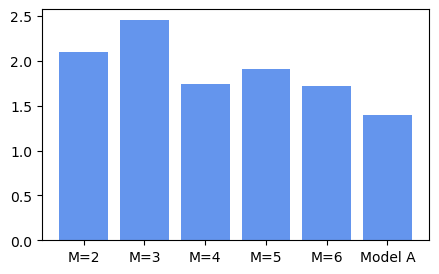

In [72]:
K = 16
Cv_A_train, Cv_A_test, WA = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss (M = 4) SD={0:.2f} cm".format(mean_Gauss_test[2]))
print("Model A SD = {0:.2f} cm".format(mean_A_test))
print("W0={0:.2f}, W1={1:.2f}, W2 = {2:.2f}".format(WA[0],WA[1],WA[2]))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2","M=3","M=4","M=5","M=6", "Model A"]

plt.figure(figsize=(5,3))
plt.bar(M, SD, tick_label = label, align="center",
        facecolor="cornflowerblue")